In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train = X_train/255.0
X_test = X_test/255.0

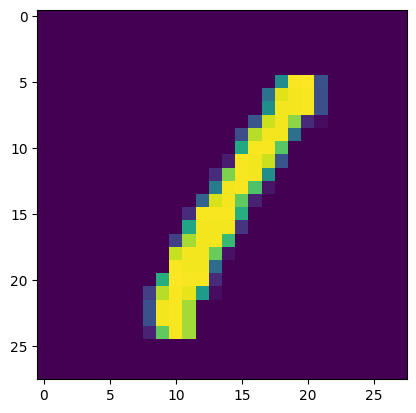

In [5]:
plt.imshow(X_train[3])

In [6]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D((2, 2)), 
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 17s 9ms/step - loss: 0.3932 - accuracy: 0.8795
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1418 - accuracy: 0.9566
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1036 - accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0830 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0716 - accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0625 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0560 - accuracy: 0.9832
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0506 - accuracy: 0.9845
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0447 - accuracy: 0.9866
Epoch 10/10
1875/1875 [==============================] - 18s 9ms/st

In [10]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0609 - accuracy: 0.9822


[0.060873378068208694, 0.982200026512146]

I thought model is overfitted but on test data too, it performed very very well.

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 average_pooling2d (Average  (None, 13, 13, 64)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 32)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 16)          4624      
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 1, 16)          0

In [12]:
cnn.save("MNIST-numbers-cnn.h5")

c:\Users\shory\anaconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
